<a href="https://colab.research.google.com/github/errec-sun/brain/blob/master/%D0%94%D0%97_%D0%BB%D0%B0%D0%B9%D1%82_%D0%A4%D0%B5%D0%B2%D1%80_%D0%BA%D1%83%D1%80%D1%81_Pro_%D0%97%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D0%B5_4_%D0%9E%D0%B1%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B0_%D1%82%D0%B5%D0%BA%D1%81%D1%82%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import библиотек

ДЗ лайт.


In [0]:
from google.colab import files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras import utils

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation
from tensorflow.python.keras.optimizers import Adam, RMSprop

from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


# Загрузка файлов

#Загрузка данных

*Разбор данного раздела:* https://youtu.be/1goYctVeppE?t=3504


In [0]:
#Загружаем файлы
files.upload()
!ls #Выводим содержимое корневой папки

Saving (Булгаков) Обучающая_5 вместе.txt to (Булгаков) Обучающая_5 вместе.txt
Saving (Булгаков) Тестовая_2 вместе.txt to (Булгаков) Тестовая_2 вместе.txt
Saving (Клиффорд_Саймак) Обучающая_5 вместе.txt to (Клиффорд_Саймак) Обучающая_5 вместе.txt
Saving (Клиффорд_Саймак) Тестовая_2 вместе.txt to (Клиффорд_Саймак) Тестовая_2 вместе.txt
Saving (Макс Фрай) Обучающая_5 вместе.txt to (Макс Фрай) Обучающая_5 вместе.txt
Saving (Макс Фрай) Тестовая_2 вместе.txt to (Макс Фрай) Тестовая_2 вместе.txt
Saving (О. Генри) Обучающая_50 вместе.txt to (О. Генри) Обучающая_50 вместе.txt
Saving (О. Генри) Тестовая_20 вместе.txt to (О. Генри) Тестовая_20 вместе.txt
Saving (Рэй Брэдберри) Обучающая_22 вместе.txt to (Рэй Брэдберри) Обучающая_22 вместе.txt
Saving (Рэй Брэдберри) Тестовая_8 вместе.txt to (Рэй Брэдберри) Тестовая_8 вместе.txt
Saving (Стругацкие) Обучающая_5 вместе.txt to (Стругацкие) Обучающая_5 вместе.txt
Saving (Стругацкие) Тестовая_2 вместе.txt to (Стругацкие) Тестовая_2 вместе.txt
 sample_da

In [0]:
#Чтение файла в текст
##########################
def readText(fileName): #функция принимает имя файла
  f = open(fileName, 'r')        #задаем открытие нужного файла в режиме чтения
  text = f.read()                #читаем текст
  text = text.replace("\n", " ") #переносы строки переводим в пробелы
  
  return text                    #функция возвращает текст файла

#Загружаем обучающие тексты
trainText = []
trainText.append(readText('(О. Генри) Обучающая_50 вместе.txt'))
trainText.append(readText('(Стругацкие) Обучающая_5 вместе.txt'))
trainText.append(readText('(Булгаков) Обучающая_5 вместе.txt'))
trainText.append(readText('(Клиффорд_Саймак) Обучающая_5 вместе.txt'))
trainText.append(readText('(Макс Фрай) Обучающая_5 вместе.txt'))
trainText.append(readText('(Рэй Брэдберри) Обучающая_22 вместе.txt')) 

className = ["О. Генри", "Стругацкие", "Булгаков", "Саймак", "Фрай", "Брэдбери"]
nClasses = len(className)

#Загружаем тестовые тексты
testText = []
testText.append(readText('(О. Генри) Тестовая_20 вместе.txt'))
testText.append(readText('(Стругацкие) Тестовая_2 вместе.txt'))
testText.append(readText('(Булгаков) Тестовая_2 вместе.txt'))
testText.append(readText('(Клиффорд_Саймак) Тестовая_2 вместе.txt'))
testText.append(readText('(Макс Фрай) Тестовая_2 вместе.txt'))
testText.append(readText('(Рэй Брэдберри) Тестовая_8 вместе.txt'))

#Обработка данных



In [0]:
#################
#Преобразовываем текстовые данные в числовые/векторные для обучения нейросетью
#################

maxWordsCount = 20000 #определяем макс.кол-во слов/индексов, учитываемое при обучении текстов

#для этого воспользуемся встроенной в Keras функцией Tokenizer для разбиения текста и превращения в матрицу числовых значений
tokenizer = Tokenizer(num_words=maxWordsCount, filters='!"#$%&()*+,-–—./:;<=>?@[\\]^_`{|}~\t\n\xa0', lower=True, split=' ', oov_token='unknown', char_level=False)
#выше задаем параметры:
#(num_words=maxWordsCount) - определяем макс.кол-во слов/индексов, учитываемое при обучении текстов
#(filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n') - избавляемся от ненужных символов
#(lower=True) - приводим слова к нижнему регистру
#(split=' ') - разделяем слова по пробелу
#(char_level=False) - просим токенайзер не удалять однобуквенные слова

tokenizer.fit_on_texts(trainText) #"скармливаем" наши тексты, т.е даём в обработку методу, который соберет словарь частотности
items = list(tokenizer.word_index.items()) #Вытаскиваем индексы слов для просмотра

In [0]:
print(items[:10])

[('unknown', 1), ('и', 2), ('в', 3), ('не', 4), ('я', 5), ('что', 6), ('на', 7), ('с', 8), ('он', 9), ('а', 10)]


In [0]:
print(items[110000:110100])

[('гусли', 110001), ('очарованные', 110002), ('молчу…', 110003), ('иголочку', 110004), ('подкрутить', 110005), ('играйте', 110006), ('противоречьте', 110007), ('облачается', 110008), ('патефону', 110009), ('водопроводчики', 110010), ('угорел', 110011), ('отворачиваешь', 110012), ('синячищи', 110013), ('печали…', 110014), ('шведов', 110015), ('голубчика', 110016), ('ниточки', 110017), ('обобрали', 110018), ('дубняк', 110019), ('артистка', 110020), ('обворовала', 110021), ('селедки', 110022), ('вооружается', 110023), ('поучу', 110024), ('интеллигентную', 110025), ('успокойтесь…', 110026), ('тихий…', 110027), ('башмаком…', 110028), ('построже…', 110029), ('дельцу', 110030), ('засвидетельствовать…', 110031), ('записано…', 110032), ('подаешь', 110033), ('хулиганьте…', 110034), ('пате…', 110035), ('чужой…', 110036), ('подписать…', 110037), ('коллективную', 110038), ('уймешься', 110039), ('вселились', 110040), ('переодел', 110041), ('батогами', 110042), ('нормален…', 110043), ('срывайте', 110

In [0]:
print("Размер словаря", len(items))

Размер словаря 144057


In [0]:
print("Протестируем словарь частотности")
print("Интересующее слово имеет индекс: ", tokenizer.word_index[input("Уточните слово: ")]) #протестируем словарь частотности

Протестируем словарь частотности
Уточните слово: казнь
Интересующее слово имеет индекс:  20435


In [0]:
#преобразовываем текст в последовательность индексов согласно частотному словарю
trainWordIndexes = tokenizer.texts_to_sequences(trainText) #обучающие тесты в индексы
testWordIndexes = tokenizer.texts_to_sequences(testText)  #проверочные тесты в индексы

print("Взглянем на фрагмент обучающего текста:")
print("В виде оригинального текста:              ", trainText[1] [:45])
print("Он же в виде последовательности индексов: ", trainWordIndexes[1][:20])

print()
print()

print("Статистика по обучающим текстам:")
for i in range(6):
  print(className[i], " ", len(trainText[i]), " символов, ", len(trainWordIndexes[i]), " слов")
print("В сумме ", len(trainText[0])+len(trainText[1])+len(trainText[2])+len(trainText[3])+len(trainText[4])+len(trainText[5]), " символов, ", len(trainWordIndexes[0])+len(trainWordIndexes[1])+len(trainWordIndexes[2])+len(trainWordIndexes[3])+len(trainWordIndexes[4])+len(trainWordIndexes[5]), " слов")
print()
print("Статистика по обучающим текстам:")
for i in range(6):
  print(className[i], " ", len(testText[i]), " символов, ", len(testWordIndexes[i]), " слов")
print("В сумме ", len(testText[0])+len(testText[1])+len(testText[2])+len(testText[3])+len(testText[4])+len(testText[5]), " символов, ", len(testWordIndexes[0])+len(testWordIndexes[1])+len(testWordIndexes[2])+len(testWordIndexes[3])+len(testWordIndexes[4])+len(testWordIndexes[5]), " слов")

Взглянем на фрагмент обучающего текста:
В виде оригинального текста:               Парень из преисподней     1     Ну и деревня!
Он же в виде последовательности индексов:  [470, 22, 1, 1482, 49, 2, 12725, 7723, 5, 415, 1, 4, 252, 2, 4, 247, 55, 6, 240, 10517]


Статистика по обучающим текстам:
О. Генри   1049517  символов,  160682  слов
Стругацкие   2042469  символов,  313405  слов
Булгаков   1765648  символов,  262109  слов
Саймак   1609507  символов,  251551  слов
Фрай   3700010  символов,  569052  слов
Брэдбери   1386454  символов,  214694  слов
В сумме  11553605  символов,  1771493  слов

Статистика по обучающим текстам:
О. Генри   349662  символов,  53255  слов
Стругацкие   704846  символов,  108730  слов
Булгаков   875042  символов,  132910  слов
Саймак   318811  символов,  50362  слов
Фрай   1278191  символов,  196911  слов
Брэдбери   868673  символов,  132746  слов
В сумме  4395225  символов,  674914  слов


#Создание обучающей и проверочной выборки

**Функции для формирования выборки по отрезкам текста с заданным шагом**

*Разбор данного раздела:* https://youtu.be/1goYctVeppE?t=4221



In [0]:
###########################
# Формирование обучающей выборки по листу индексов слов
# (разделение на короткие векторы)
##########################
def getSetFromIndexes(wordIndexes, xLen, step):
  xSample = []
  wordsLen = len(wordIndexes)
  index = 0
  
  #Идём по всей длине вектора индексов
  #"Откусываем" векторы длины xLen и смещаеммся вперёд на step
  
  while (index + xLen <= wordsLen):
    xSample.append(wordIndexes[index:index+xLen])
    index += step
    
  return xSample

In [0]:
###########################
# Формирование обучающей и проверочной выборки
# Из двух листов индексов от двух классов
##########################
def createSetsMultiClasses(wordIndexes, xLen, step): #функция принимает последовательность индексов, размер окна, шаг окна

  #Для каждого из 6 классов
  #Создаём обучающую/проверочную выборку из индексов
  nClasses = len(wordIndexes) #задаем количество классов выборки
  classesXSamples = []        #здесь будет список размером "кол-во классов*кол-во окон в тексте*длину окна(например 6 по 1341*1000)"
  for wI in wordIndexes:      #для каждого текста выборки из последовательности индексов
    classesXSamples.append(getSetFromIndexes(wI, xLen, step)) #добавляем в список очередной текст индексов, разбитый на "кол-во окон*длину окна" 

  #Формируем один общий xSamples
  xSamples = [] #здесь будет список размером "суммарное кол-во окон во всех текстах*длину окна(например 15779*1000)"
  ySamples = [] #здесь будет список размером "суммарное кол-во окон во всех текстах*вектор длиной 6"
  
  for t in range(nClasses): #в диапазоне кол-ва классов(6)
    xT = classesXSamples[t] #берем очередной текст вида "кол-во окон в тексте*длину окна"(например 1341*1000)
    for i in range(len(xT)): #и каждое его окно
      xSamples.append(xT[i]) #добавляем в общий список выборки
    
    #Формируем ySamples по номеру класса
    currY = utils.to_categorical(t, nClasses) #текущий класс переводится в вектор длиной 6 вида [0.0.0.1.0.0.]
    for i in range(len(xT)): #на каждое окно выборки 
      ySamples.append(currY) #добавляем соответствующий вектор класса

  xSamples = np.array(xSamples) #переводим в массив numpy для подачи в нейронку
  ySamples = np.array(ySamples) #переводим в массив numpy для подачи в нейронку

  
  return (xSamples, ySamples) #функция возвращает выборку и соответствующие векторы классов

**Подготовка данных**

*Разбор данного раздела:* https://youtu.be/1goYctVeppE?t=4628


In [0]:
#Задаём базовые параметры
xLen = 1000 #Длина отрезка текста, по которой анализируем, в словах
step = 100 #Шаг разбиения исходного текста на обучающие вектора

In [0]:
#Формируем обучающую и тестовую выборку
xTrain, yTrain = createSetsMultiClasses(trainWordIndexes, xLen, step) #извлекаем обучающую выборку
xTest, yTest = createSetsMultiClasses(testWordIndexes, xLen, step)    #извлекаем тестовую выборку
print(xTrain.shape)
print(yTrain.shape)
print(xTest.shape)
print(yTest.shape)
#получили обучающий/тестовый набор, достаточный для запуска Embedding, но для Bag of Words нужно xTrain и xTest представить в виде векторов из 0 и 1

(17658, 1000)
(17658, 6)
(6693, 1000)
(6693, 6)


In [0]:
print(xTrain[1])

In [0]:
#Преобразовываем полученные выборки из последовательности индексов в матрицы нулей и единиц по принципу Bag of Words
xTrain01 = tokenizer.sequences_to_matrix(xTrain.tolist())#подаем xTrain в виде списка чтобы метод успешно сработал
xTest01 = tokenizer.sequences_to_matrix(xTest.tolist())#подаем xTest в виде списка чтобы метод успешно сработал
print(xTrain01.shape)       #Размер обучающей выборки, сформированной по Bag of Words
print(xTrain01[0][0:100]) #фрагмент набора слов в виде Bag of Words

(17658, 20000)
[0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.
 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0.
 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1.
 0. 0. 1. 1.]


In [0]:
print(xTrain01[0][10000:11000])

#Нейросеть

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 17658 samples, validate on 6693 samples
Epoch 1/20
17658/17658 [==============================] - 5s 295us/sample - loss: 0.4102 - acc: 0.9837 - val_loss: 0.9189 - val_acc: 0.6507
Epoch 2/20
17658/17658 [==============================] - 3s 192us/sample - loss: 0.1030 - acc: 0.9979 - val_loss: 0.5798 - val_acc: 0.8076
Epoch 3/20
17658/17658 [==============================] - 3s 193us/sample - loss: 0.0587 - acc: 0.9992 - val_loss: 0.4027 - val_acc: 0.8697
Epoch 4/20
17658/17658 [==============================] - 3s 193us/sample - loss: 0.0448 - acc: 0.9998 - val_loss: 0.3716 - val_acc: 0.8755
Epoch 5/20
17658/17658 [==============================] - 3s 193us/sample - loss: 0.0370 - acc: 0.9999 - val_loss: 0.3628 - val_acc: 0.8824
Epoch 6/20
17658/17658 [==============================] - 3s 195us/sample - 

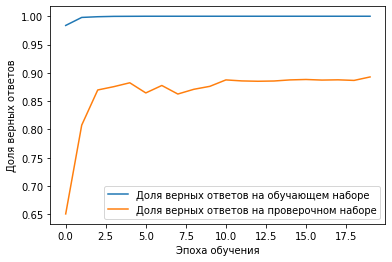

In [0]:
#Создаём полносвязную сеть
model01 = Sequential()
model01.add(BatchNormalization())
model01.add(Dense(200, input_dim=maxWordsCount, activation="relu"))
model01.add(Dropout(0.25))
model01.add(BatchNormalization())
model01.add(Dense(6, activation='sigmoid'))

model01.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

#Обучаем сеть на выборке, сформированной по bag of words - xTrain01
history = model01.fit(xTrain01, 
                      yTrain, 
                      epochs=20,
                      batch_size=128,
                      validation_data=(xTest01, yTest))

plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

#Распознавание проверочной выборки

*

In [0]:
###########################
# Представляем тестовую выборку в удобных для распознавания размерах
##########################
def createTestMultiClasses(wordIndexes, xLen, step): #функция принимает последовательность индексов, размер окна, шаг окна

  #Для каждого из 6 классов
  #Создаём тестовую выборку из индексов
  nClasses = len(wordIndexes) #задаем количество классов
  xTest6Classes01 = []                #здесь будет список из всех классов,каждый размером "кол-во окон в тексте * 20000(при maxWordsCount=20000)"
  xTest6Classes = []                 #здесь будет список массивов, каждый размером "кол-во окон в тексте * длину окна"(6 по 420*1000)
  for wI in wordIndexes:                       #для каждого тестового текста из последовательности индексов
    sample = (getSetFromIndexes(wI, xLen, step)) #тестовая выборка размером "кол-во окон*длину окна"(например 420*1000)
    xTest6Classes.append(np.array(sample))              #переводим в массив numpy и добавляем в список
    xTest6Classes01.append(tokenizer.sequences_to_matrix(sample)) #трансформируется в Bag of Words в виде "кол-во окон в тексте * 20000"
  xTest6Classes01 = np.array(xTest6Classes01)                     #и добавляется к нашему списку, 
  
  return xTest6Classes01, xTest6Classes  #функция вернёт тестовые данные: TestBag 6 классов на n*20000 и xTestEm 6 по n*1000

###########################
# Расспознаём тестовую выборку и выводим результаты
##########################
def recognizeMultiClass(model, xTest, modelName):
  print("НЕЙРОНКА: ", modelName)
  print()
  
  val = []
  pred = []
  
  totalSumRec = []
  
  #Проходим по всем классам
  for i in range(nClasses):
    #Получаем результаты распознавания класса по блокам слов длины xLen
    currPred = model.predict(xTest[i])
    pred.append(currPred)
    #Определяем номер распознанного класса для каждохо блока слов длины xLen
    currOut = np.argmax(currPred, axis=1)
    
    #Считаем процент распознавания каждого класса за каждый
    #Получам матрицу 6 на 6
    evVal = []
    sumRec = []
    for j in range(nClasses):
      sumRec.append(0)
      for t in range(len(currOut)):
        if (currOut[t] == j):
          sumRec[j] += 1
      evVal.append(sumRec[j] / len(currOut))
    
    totalSumRec.append(sumRec[i])
    
    #Определяем, какой в класс в итоге за какой был распознан
    val.append(evVal[i])
    recognizedClass = np.argmax(evVal)
    
    #Выводим результаты распознавания по текущему классу
    isRecognized = "распознано НЕ ВЕРНО!"
    if (recognizedClass == i):
      isRecognized = "распознано ВЕРНО!"
    print(className[i], " распознано ", int(100*evVal[i]), "% сеть считает, что это ", className[recognizedClass], ", ", isRecognized, sep='')
  
  #Выводим вредний процент распознавания по всем классам вместе
  print()
  sumVal = 0
  sumCount = 0
  lenXtest = []
  for i in range(nClasses):
    sumCount += len(xTest[i])
    sumVal += totalSumRec[i]
  print("Средний процент распознавания ", int(100*sumVal/sumCount), "%", sep='')
    
  print()
  
  return sumVal/sumCount

In [0]:
xTest6Classes01, xTest6Classes = createTestMultiClasses(testWordIndexes, xLen, step)

In [0]:
#Проверяем точность нейронки обученной на bag of words
pred = recognizeMultiClass(model01, xTest6Classes01, "Тексты 01 + Dense")

НЕЙРОНКА:  Тексты 01 + Dense

О. Генри распознано 88% сеть считает, что это О. Генри, распознано ВЕРНО!
Стругацкие распознано 88% сеть считает, что это Стругацкие, распознано ВЕРНО!
Булгаков распознано 89% сеть считает, что это Булгаков, распознано ВЕРНО!
Саймак распознано 82% сеть считает, что это Саймак, распознано ВЕРНО!
Фрай распознано 92% сеть считает, что это Фрай, распознано ВЕРНО!
Брэдбери распознано 87% сеть считает, что это Брэдбери, распознано ВЕРНО!

Средний процент распознавания 89%



# 1 Задание различные значения max words count.

**f** maxWordsCount = 50000 #определяем макс.кол-во слов/индексов

In [0]:

maxWordsCount = 50000 #определяем макс.кол-во слов/индексов, учитываемое при обучении текстов

Train on 17658 samples, validate on 6693 samples
Epoch 1/8
17658/17658 [==============================] - 19s 1ms/sample - loss: 0.4634 - acc: 0.9747 - val_loss: 1.2001 - val_acc: 0.4951
Epoch 2/8
17658/17658 [==============================] - 19s 1ms/sample - loss: 0.1385 - acc: 0.9622 - val_loss: 0.8410 - val_acc: 0.6486
Epoch 3/8
17658/17658 [==============================] - 19s 1ms/sample - loss: 0.0740 - acc: 0.9605 - val_loss: 0.5598 - val_acc: 0.7890
Epoch 4/8
17658/17658 [==============================] - 19s 1ms/sample - loss: 0.0560 - acc: 0.9610 - val_loss: 0.4383 - val_acc: 0.8430
Epoch 5/8
17658/17658 [==============================] - 19s 1ms/sample - loss: 0.0492 - acc: 0.9642 - val_loss: 0.4264 - val_acc: 0.8522
Epoch 6/8
17658/17658 [==============================] - 19s 1ms/sample - loss: 0.0444 - acc: 0.9690 - val_loss: 0.4615 - val_acc: 0.8479
Epoch 7/8
17658/17658 [==============================] - 19s 1ms/sample - loss: 0.0243 - acc: 0.9876 - val_loss: 0.4688 - v

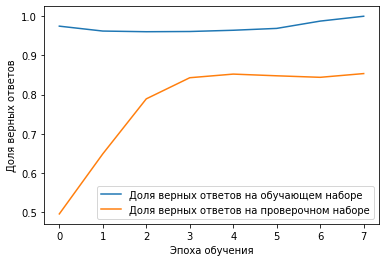

In [0]:
#Создаём полносвязную сеть
model01 = Sequential()
model01.add(BatchNormalization())
model01.add(Dense(200, input_dim=maxWordsCount, activation="relu"))
model01.add(Dropout(0.35))
model01.add(BatchNormalization())
model01.add(Dense(6, activation='sigmoid'))

model01.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

#Обучаем сеть на выборке, сформированной по bag of words - xTrain01
history = model01.fit(xTrain01, 
                      yTrain, 
                      epochs=8,
                      batch_size=128,
                      validation_data=(xTest01, yTest))

plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Train on 17658 samples, validate on 6693 samples
Epoch 1/5
17658/17658 [==============================] - 28s 2ms/sample - loss: 9.0379e-04 - acc: 1.0000 - val_loss: 0.3199 - val_acc: 0.9095
Epoch 2/5
17658/17658 [==============================] - 28s 2ms/sample - loss: 8.7742e-04 - acc: 1.0000 - val_loss: 0.3087 - val_acc: 0.9110
Epoch 3/5
17658/17658 [==============================] - 28s 2ms/sample - loss: 8.6576e-04 - acc: 1.0000 - val_loss: 0.3173 - val_acc: 0.9090
Epoch 4/5
17658/17658 [==============================] - 28s 2ms/sample - loss: 8.6790e-04 - acc: 1.0000 - val_loss: 0.3101 - val_acc: 0.9104
Epoch 5/5
17658/17658 [==============================] - 28s 2ms/sample - loss: 8.7455e-04 - acc: 1.0000 - val_loss: 0.3151 - val_acc: 0.9096


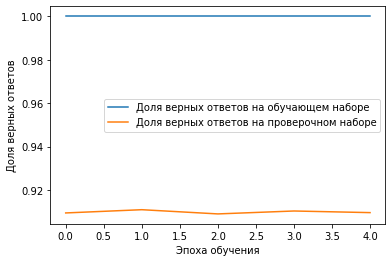

In [0]:
model01.compile(optimizer=Adam(lr=0.00001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

#Обучаем сеть на выборке, сформированной по bag of words - xTrain01
history = model01.fit(xTrain01, 
                      yTrain, 
                      epochs=5,
                      batch_size=64,
                      validation_data=(xTest01, yTest))

plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

**ВЫВОД** результат 0.9110

**e**  maxWordsCount 10000 

In [0]:
maxWordsCount = 10000

Train on 17658 samples, validate on 6693 samples
Epoch 1/13
17658/17658 [==============================] - 20s 1ms/sample - loss: 0.4063 - acc: 0.9752 - val_loss: 0.7466 - val_acc: 0.7263
Epoch 2/13
17658/17658 [==============================] - 19s 1ms/sample - loss: 0.0906 - acc: 0.9763 - val_loss: 0.4222 - val_acc: 0.8609
Epoch 3/13
17658/17658 [==============================] - 20s 1ms/sample - loss: 0.0425 - acc: 0.9795 - val_loss: 0.2959 - val_acc: 0.9054
Epoch 4/13
17658/17658 [==============================] - 20s 1ms/sample - loss: 0.0285 - acc: 0.9850 - val_loss: 0.3037 - val_acc: 0.8999
Epoch 5/13
17658/17658 [==============================] - 20s 1ms/sample - loss: 0.0190 - acc: 0.9938 - val_loss: 0.3728 - val_acc: 0.8835
Epoch 6/13
17658/17658 [==============================] - 20s 1ms/sample - loss: 0.0030 - acc: 0.9999 - val_loss: 0.3246 - val_acc: 0.8962
Epoch 7/13
17658/17658 [==============================] - 20s 1ms/sample - loss: 0.0013 - acc: 1.0000 - val_loss: 0.3

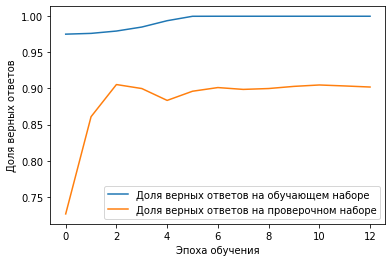

In [0]:
#Создаём полносвязную сеть
model01 = Sequential()
model01.add(BatchNormalization())
model01.add(Dense(200, input_dim=maxWordsCount, activation="relu"))
model01.add(Dropout(0.25))
model01.add(BatchNormalization())
model01.add(Dense(6, activation='sigmoid'))

model01.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

#Обучаем сеть на выборке, сформированной по bag of words - xTrain01
history = model01.fit(xTrain01, 
                      yTrain, 
                      epochs=13,
                      batch_size=128,
                      validation_data=(xTest01, yTest))

plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

**вывод** хуже на 0,01

**d** maxWordsCount = 5000

In [0]:
maxWordsCount = 5000

Train on 17658 samples, validate on 6693 samples
Epoch 1/13
17658/17658 [==============================] - 21s 1ms/sample - loss: 0.3867 - acc: 0.9750 - val_loss: 0.9682 - val_acc: 0.6239
Epoch 2/13
17658/17658 [==============================] - 20s 1ms/sample - loss: 0.0893 - acc: 0.9679 - val_loss: 0.5969 - val_acc: 0.7702
Epoch 3/13
17658/17658 [==============================] - 19s 1ms/sample - loss: 0.0540 - acc: 0.9755 - val_loss: 0.3497 - val_acc: 0.8773
Epoch 4/13
17658/17658 [==============================] - 20s 1ms/sample - loss: 0.0191 - acc: 0.9975 - val_loss: 0.2357 - val_acc: 0.9238
Epoch 5/13
17658/17658 [==============================] - 20s 1ms/sample - loss: 0.0036 - acc: 1.0000 - val_loss: 0.2414 - val_acc: 0.9210
Epoch 6/13
17658/17658 [==============================] - 19s 1ms/sample - loss: 0.0020 - acc: 1.0000 - val_loss: 0.2613 - val_acc: 0.9154
Epoch 7/13
17658/17658 [==============================] - 20s 1ms/sample - loss: 0.0013 - acc: 1.0000 - val_loss: 0.2

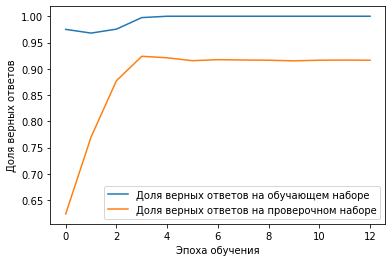

In [0]:
#Создаём полносвязную сеть
model01 = Sequential()
model01.add(BatchNormalization())
model01.add(Dense(200, input_dim=maxWordsCount, activation="relu"))
model01.add(Dropout(0.25))
model01.add(BatchNormalization())
model01.add(Dense(6, activation='sigmoid'))

model01.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

#Обучаем сеть на выборке, сформированной по bag of words - xTrain01
history = model01.fit(xTrain01, 
                      yTrain, 
                      epochs=13,
                      batch_size=128,
                      validation_data=(xTest01, yTest))

plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

**вывод** результат лучше 0.9238

**c** maxWordsCount = 1000

In [0]:
maxWordsCount = 1000

Train on 17658 samples, validate on 6693 samples
Epoch 1/13
17658/17658 [==============================] - 20s 1ms/sample - loss: 0.3978 - acc: 0.9623 - val_loss: 0.9921 - val_acc: 0.6015
Epoch 2/13
17658/17658 [==============================] - 19s 1ms/sample - loss: 0.1122 - acc: 0.9225 - val_loss: 0.6890 - val_acc: 0.7197
Epoch 3/13
17658/17658 [==============================] - 19s 1ms/sample - loss: 0.0817 - acc: 0.9171 - val_loss: 0.5230 - val_acc: 0.8156
Epoch 4/13
17658/17658 [==============================] - 19s 1ms/sample - loss: 0.0700 - acc: 0.9309 - val_loss: 0.4894 - val_acc: 0.8349
Epoch 5/13
17658/17658 [==============================] - 19s 1ms/sample - loss: 0.0440 - acc: 0.9695 - val_loss: 0.5543 - val_acc: 0.8324
Epoch 6/13
17658/17658 [==============================] - 19s 1ms/sample - loss: 0.0111 - acc: 0.9953 - val_loss: 0.4599 - val_acc: 0.8593
Epoch 7/13
17658/17658 [==============================] - 19s 1ms/sample - loss: 0.0028 - acc: 0.9991 - val_loss: 0.4

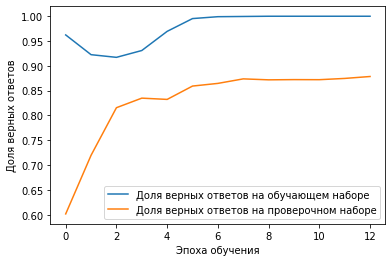

In [0]:
#Создаём полносвязную сеть
model01 = Sequential()
model01.add(BatchNormalization())
model01.add(Dense(200, input_dim=maxWordsCount, activation="relu"))
model01.add(Dropout(0.25))
model01.add(BatchNormalization())
model01.add(Dense(6, activation='sigmoid'))

model01.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

#Обучаем сеть на выборке, сформированной по bag of words - xTrain01
history = model01.fit(xTrain01, 
                      yTrain, 
                      epochs=13,
                      batch_size=128,
                      validation_data=(xTest01, yTest))

plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [0]:
# Представляем тестовую выборку в удобных для распознавания размерах
##########################
def createTestMultiClasses(wordIndexes, xLen, step): #функция принимает последовательность индексов, размер окна, шаг окна

  #Для каждого из 6 классов
  #Создаём тестовую выборку из индексов
  nClasses = len(wordIndexes) #задаем количество классов
  xTest6Classes01 = []                #здесь будет список из всех классов,каждый размером "кол-во окон в тексте * 20000(при maxWordsCount=20000)"
  xTest6Classes = []                 #здесь будет список массивов, каждый размером "кол-во окон в тексте * длину окна"(6 по 420*1000)
  for wI in wordIndexes:                       #для каждого тестового текста из последовательности индексов
    sample = (getSetFromIndexes(wI, xLen, step)) #тестовая выборка размером "кол-во окон*длину окна"(например 420*1000)
    xTest6Classes.append(np.array(sample))              #переводим в массив numpy и добавляем в список
    xTest6Classes01.append(tokenizer.sequences_to_matrix(sample)) #трансформируется в Bag of Words в виде "кол-во окон в тексте * 20000"
  xTest6Classes01 = np.array(xTest6Classes01)                     #и добавляется к нашему списку, 
  
  return xTest6Classes01, xTest6Classes  #функция вернёт тестовые данные: TestBag 6 классов на n*20000 и xTestEm 6 по n*1000

###########################
# Расспознаём тестовую выборку и выводим результаты
##########################
def recognizeMultiClass(model, xTest, modelName):
  print("НЕЙРОНКА: ", modelName)
  print()
  
  val = []
  pred = []
  
  totalSumRec = []
  
  #Проходим по всем классам
  for i in range(nClasses):
    #Получаем результаты распознавания класса по блокам слов длины xLen
    currPred = model.predict(xTest[i])
    pred.append(currPred)
    #Определяем номер распознанного класса для каждохо блока слов длины xLen
    currOut = np.argmax(currPred, axis=1)
    
    #Считаем процент распознавания каждого класса за каждый
    #Получам матрицу 6 на 6
    evVal = []
    sumRec = []
    for j in range(nClasses):
      sumRec.append(0)
      for t in range(len(currOut)):
        if (currOut[t] == j):
          sumRec[j] += 1
      evVal.append(sumRec[j] / len(currOut))
    
    totalSumRec.append(sumRec[i])
    
    #Определяем, какой в класс в итоге за какой был распознан
    val.append(evVal[i])
    recognizedClass = np.argmax(evVal)
    
    #Выводим результаты распознавания по текущему классу
    isRecognized = "распознано НЕ ВЕРНО!"
    if (recognizedClass == i):
      isRecognized = "распознано ВЕРНО!"
    print(className[i], " распознано ", int(100*evVal[i]), "% сеть считает, что это ", className[recognizedClass], ", ", isRecognized, sep='')
  
  #Выводим вредний процент распознавания по всем классам вместе
  print()
  sumVal = 0
  sumCount = 0
  lenXtest = []
  for i in range(nClasses):
    sumCount += len(xTest[i])
    sumVal += totalSumRec[i]
  print("Средний процент распознавания ", int(100*sumVal/sumCount), "%", sep='')
    
  print()
  
  return sumVal/sumCount

In [0]:
xTest6Classes01, xTest6Classes = createTestMultiClasses(testWordIndexes, xLen, step)

In [0]:
#Проверяем точность нейронки обученной на bag of words
pred = recognizeMultiClass(model01, xTest6Classes01, "Тексты 01 + Dense")

НЕЙРОНКА:  Тексты 01 + Dense

О. Генри распознано 55% сеть считает, что это О. Генри, распознано ВЕРНО!
Стругацкие распознано 88% сеть считает, что это Стругацкие, распознано ВЕРНО!
Булгаков распознано 84% сеть считает, что это Булгаков, распознано ВЕРНО!
Саймак распознано 90% сеть считает, что это Саймак, распознано ВЕРНО!
Фрай распознано 93% сеть считает, что это Фрай, распознано ВЕРНО!
Брэдбери распознано 93% сеть считает, что это Брэдбери, распознано ВЕРНО!

Средний процент распознавания 87%



**вывод**

**b** maxWordsCount = 500

In [0]:
maxWordsCount = 500

Train on 17658 samples, validate on 6693 samples
Epoch 1/13
17658/17658 [==============================] - 21s 1ms/sample - loss: 0.3892 - acc: 0.9801 - val_loss: 0.8145 - val_acc: 0.6962
Epoch 2/13
17658/17658 [==============================] - 19s 1ms/sample - loss: 0.0713 - acc: 0.9943 - val_loss: 0.5159 - val_acc: 0.8116
Epoch 3/13
17658/17658 [==============================] - 19s 1ms/sample - loss: 0.0245 - acc: 0.9981 - val_loss: 0.3422 - val_acc: 0.8779
Epoch 4/13
17658/17658 [==============================] - 19s 1ms/sample - loss: 0.0098 - acc: 0.9999 - val_loss: 0.2803 - val_acc: 0.9057
Epoch 5/13
17658/17658 [==============================] - 19s 1ms/sample - loss: 0.0035 - acc: 1.0000 - val_loss: 0.2698 - val_acc: 0.9095
Epoch 6/13
17658/17658 [==============================] - 19s 1ms/sample - loss: 0.0019 - acc: 1.0000 - val_loss: 0.2858 - val_acc: 0.9050
Epoch 7/13
17658/17658 [==============================] - 20s 1ms/sample - loss: 0.0013 - acc: 1.0000 - val_loss: 0.2

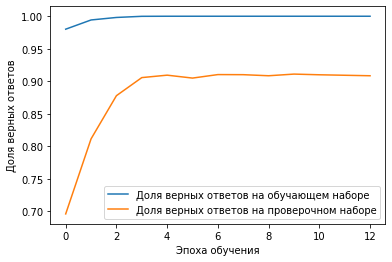

In [0]:
#Создаём полносвязную сеть
model01 = Sequential()
model01.add(BatchNormalization())
model01.add(Dense(200, input_dim=maxWordsCount, activation="relu"))
model01.add(Dropout(0.25))
model01.add(BatchNormalization())
model01.add(Dense(6, activation='sigmoid'))

model01.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

#Обучаем сеть на выборке, сформированной по bag of words - xTrain01
history = model01.fit(xTrain01, 
                      yTrain, 
                      epochs=13,
                      batch_size=128,
                      validation_data=(xTest01, yTest))

plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

**a** maxWordsCount = 100

In [0]:
maxWordsCount = 100

Train on 17658 samples, validate on 6693 samples
Epoch 1/13
17658/17658 [==============================] - 20s 1ms/sample - loss: 0.4115 - acc: 0.9730 - val_loss: 0.8316 - val_acc: 0.6925
Epoch 2/13
17658/17658 [==============================] - 19s 1ms/sample - loss: 0.1011 - acc: 0.9596 - val_loss: 0.5038 - val_acc: 0.8312
Epoch 3/13
17658/17658 [==============================] - 19s 1ms/sample - loss: 0.0570 - acc: 0.9595 - val_loss: 0.3839 - val_acc: 0.8582
Epoch 4/13
17658/17658 [==============================] - 19s 1ms/sample - loss: 0.0383 - acc: 0.9699 - val_loss: 0.3254 - val_acc: 0.8902
Epoch 5/13
17658/17658 [==============================] - 19s 1ms/sample - loss: 0.0261 - acc: 0.9825 - val_loss: 0.3288 - val_acc: 0.8956
Epoch 6/13
17658/17658 [==============================] - 19s 1ms/sample - loss: 0.0070 - acc: 0.9993 - val_loss: 0.3703 - val_acc: 0.8884
Epoch 7/13
17658/17658 [==============================] - 19s 1ms/sample - loss: 0.0015 - acc: 1.0000 - val_loss: 0.3

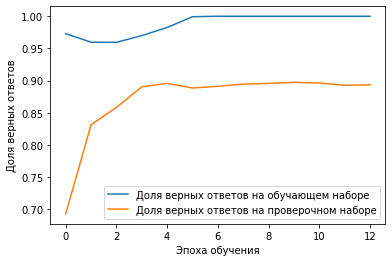

In [0]:
#Создаём полносвязную сеть
model01 = Sequential()
model01.add(BatchNormalization())
model01.add(Dense(200, input_dim=maxWordsCount, activation="relu"))
model01.add(Dropout(0.25))
model01.add(BatchNormalization())
model01.add(Dense(6, activation='sigmoid'))

model01.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

#Обучаем сеть на выборке, сформированной по bag of words - xTrain01
history = model01.fit(xTrain01, 
                      yTrain, 
                      epochs=13,
                      batch_size=128,
                      validation_data=(xTest01, yTest))

plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [0]:
# Представляем тестовую выборку в удобных для распознавания размерах
##########################
def createTestMultiClasses(wordIndexes, xLen, step): #функция принимает последовательность индексов, размер окна, шаг окна

  #Для каждого из 6 классов
  #Создаём тестовую выборку из индексов
  nClasses = len(wordIndexes) #задаем количество классов
  xTest6Classes01 = []                #здесь будет список из всех классов,каждый размером "кол-во окон в тексте * 20000(при maxWordsCount=20000)"
  xTest6Classes = []                 #здесь будет список массивов, каждый размером "кол-во окон в тексте * длину окна"(6 по 420*1000)
  for wI in wordIndexes:                       #для каждого тестового текста из последовательности индексов
    sample = (getSetFromIndexes(wI, xLen, step)) #тестовая выборка размером "кол-во окон*длину окна"(например 420*1000)
    xTest6Classes.append(np.array(sample))              #переводим в массив numpy и добавляем в список
    xTest6Classes01.append(tokenizer.sequences_to_matrix(sample)) #трансформируется в Bag of Words в виде "кол-во окон в тексте * 20000"
  xTest6Classes01 = np.array(xTest6Classes01)                     #и добавляется к нашему списку, 
  
  return xTest6Classes01, xTest6Classes  #функция вернёт тестовые данные: TestBag 6 классов на n*20000 и xTestEm 6 по n*1000

###########################
# Расспознаём тестовую выборку и выводим результаты
##########################
def recognizeMultiClass(model, xTest, modelName):
  print("НЕЙРОНКА: ", modelName)
  print()
  
  val = []
  pred = []
  
  totalSumRec = []
  
  #Проходим по всем классам
  for i in range(nClasses):
    #Получаем результаты распознавания класса по блокам слов длины xLen
    currPred = model.predict(xTest[i])
    pred.append(currPred)
    #Определяем номер распознанного класса для каждохо блока слов длины xLen
    currOut = np.argmax(currPred, axis=1)
    
    #Считаем процент распознавания каждого класса за каждый
    #Получам матрицу 6 на 6
    evVal = []
    sumRec = []
    for j in range(nClasses):
      sumRec.append(0)
      for t in range(len(currOut)):
        if (currOut[t] == j):
          sumRec[j] += 1
      evVal.append(sumRec[j] / len(currOut))
    
    totalSumRec.append(sumRec[i])
    
    #Определяем, какой в класс в итоге за какой был распознан
    val.append(evVal[i])
    recognizedClass = np.argmax(evVal)
    
    #Выводим результаты распознавания по текущему классу
    isRecognized = "распознано НЕ ВЕРНО!"
    if (recognizedClass == i):
      isRecognized = "распознано ВЕРНО!"
    print(className[i], " распознано ", int(100*evVal[i]), "% сеть считает, что это ", className[recognizedClass], ", ", isRecognized, sep='')
  
  #Выводим вредний процент распознавания по всем классам вместе
  print()
  sumVal = 0
  sumCount = 0
  lenXtest = []
  for i in range(nClasses):
    sumCount += len(xTest[i])
    sumVal += totalSumRec[i]
  print("Средний процент распознавания ", int(100*sumVal/sumCount), "%", sep='')
    
  print()
  
  return sumVal/sumCount

In [0]:
xTest6Classes01, xTest6Classes = createTestMultiClasses(testWordIndexes, xLen, step)

In [0]:
#Проверяем точность нейронки обученной на bag of words
pred = recognizeMultiClass(model01, xTest6Classes01, "Тексты 01 + Dense")

НЕЙРОНКА:  Тексты 01 + Dense

О. Генри распознано 78% сеть считает, что это О. Генри, распознано ВЕРНО!
Стругацкие распознано 90% сеть считает, что это Стругацкие, распознано ВЕРНО!
Булгаков распознано 83% сеть считает, что это Булгаков, распознано ВЕРНО!
Саймак распознано 78% сеть считает, что это Саймак, распознано ВЕРНО!
Фрай распознано 92% сеть считает, что это Фрай, распознано ВЕРНО!
Брэдбери распознано 98% сеть считает, что это Брэдбери, распознано ВЕРНО!

Средний процент распознавания 89%



**вывод** Какая умная сетка даже на 100 словах отличает авторов хорошо.

Наилучший результат **maxWordsCount** = **10000** val_acc: 0.9238

#2 РАзные архитектуры

In [0]:
maxWordsCount = 20000 # возвращаем

**i** разные активационные функции ely и на выходе softmax.

Train on 17658 samples, validate on 6693 samples
Epoch 1/13
17658/17658 [==============================] - 21s 1ms/sample - loss: 0.0415 - acc: 0.9873 - val_loss: 0.5762 - val_acc: 0.8645
Epoch 2/13
17658/17658 [==============================] - 19s 1ms/sample - loss: 4.5859e-04 - acc: 1.0000 - val_loss: 0.4417 - val_acc: 0.8878
Epoch 3/13
17658/17658 [==============================] - 19s 1ms/sample - loss: 2.3029e-04 - acc: 1.0000 - val_loss: 0.3829 - val_acc: 0.8875
Epoch 4/13
17658/17658 [==============================] - 19s 1ms/sample - loss: 1.6052e-04 - acc: 1.0000 - val_loss: 0.3744 - val_acc: 0.8814
Epoch 5/13
17658/17658 [==============================] - 20s 1ms/sample - loss: 1.1129e-04 - acc: 1.0000 - val_loss: 0.3812 - val_acc: 0.8793
Epoch 6/13
17658/17658 [==============================] - 20s 1ms/sample - loss: 8.6954e-05 - acc: 1.0000 - val_loss: 0.3827 - val_acc: 0.8793
Epoch 7/13
17658/17658 [==============================] - 19s 1ms/sample - loss: 7.4203e-05 - acc

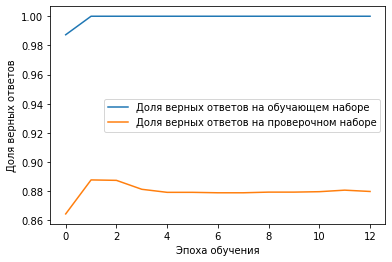

НЕЙРОНКА:  Тексты 01 + Dense

О. Генри распознано 89% сеть считает, что это О. Генри, распознано ВЕРНО!
Стругацкие распознано 88% сеть считает, что это Стругацкие, распознано ВЕРНО!
Булгаков распознано 78% сеть считает, что это Булгаков, распознано ВЕРНО!
Саймак распознано 76% сеть считает, что это Саймак, распознано ВЕРНО!
Фрай распознано 90% сеть считает, что это Фрай, распознано ВЕРНО!
Брэдбери распознано 97% сеть считает, что это Брэдбери, распознано ВЕРНО!

Средний процент распознавания 87%



In [0]:
#Создаём полносвязную сеть
model01 = Sequential()
model01.add(BatchNormalization())
model01.add(Dense(200, input_dim=maxWordsCount, activation="elu"))
model01.add(Dropout(0.35))
model01.add(BatchNormalization())
model01.add(Dense(6, activation='softmax'))

model01.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

#Обучаем сеть на выборке, сформированной по bag of words - xTrain01
history = model01.fit(xTrain01, 
                      yTrain, 
                      epochs=13,
                      batch_size=128,
                      validation_data=(xTest01, yTest))

plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

pred = recognizeMultiClass(model01, xTest6Classes01, "Тексты 01 + Dense")

**вывод** результат хуже 0.8808

везде sigmoid

Train on 17658 samples, validate on 6693 samples
Epoch 1/13
17658/17658 [==============================] - 20s 1ms/sample - loss: 0.4508 - acc: 0.9755 - val_loss: 0.9815 - val_acc: 0.5246
Epoch 2/13
17658/17658 [==============================] - 19s 1ms/sample - loss: 0.0820 - acc: 0.9913 - val_loss: 0.8954 - val_acc: 0.6741
Epoch 3/13
17658/17658 [==============================] - 19s 1ms/sample - loss: 0.0171 - acc: 0.9996 - val_loss: 0.4878 - val_acc: 0.8427
Epoch 4/13
17658/17658 [==============================] - 19s 1ms/sample - loss: 0.0059 - acc: 1.0000 - val_loss: 0.3998 - val_acc: 0.8814
Epoch 5/13
17658/17658 [==============================] - 19s 1ms/sample - loss: 0.0031 - acc: 1.0000 - val_loss: 0.4082 - val_acc: 0.8867
Epoch 6/13
17658/17658 [==============================] - 19s 1ms/sample - loss: 0.0019 - acc: 1.0000 - val_loss: 0.4152 - val_acc: 0.8870
Epoch 7/13
17658/17658 [==============================] - 19s 1ms/sample - loss: 0.0014 - acc: 1.0000 - val_loss: 0.4

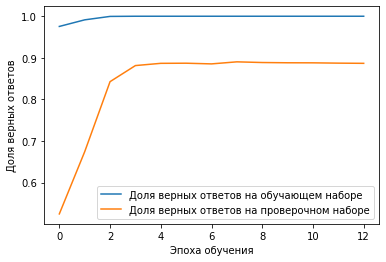

НЕЙРОНКА:  Тексты 01 + Dense

О. Генри распознано 80% сеть считает, что это О. Генри, распознано ВЕРНО!
Стругацкие распознано 88% сеть считает, что это Стругацкие, распознано ВЕРНО!
Булгаков распознано 76% сеть считает, что это Булгаков, распознано ВЕРНО!
Саймак распознано 84% сеть считает, что это Саймак, распознано ВЕРНО!
Фрай распознано 93% сеть считает, что это Фрай, распознано ВЕРНО!
Брэдбери распознано 98% сеть считает, что это Брэдбери, распознано ВЕРНО!

Средний процент распознавания 88%



In [0]:
#Создаём полносвязную сеть
model01 = Sequential()
model01.add(BatchNormalization())
model01.add(Dense(200, input_dim=maxWordsCount, activation="sigmoid"))
model01.add(Dropout(0.35))
model01.add(BatchNormalization())
model01.add(Dense(6, activation='sigmoid'))

model01.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

#Обучаем сеть на выборке, сформированной по bag of words - xTrain01
history = model01.fit(xTrain01, 
                      yTrain, 
                      epochs=13,
                      batch_size=128,
                      validation_data=(xTest01, yTest))

plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

pred = recognizeMultiClass(model01, xTest6Classes01, "Тексты 01 + Dense")

sigmoid и linear

Train on 17658 samples, validate on 6693 samples
Epoch 1/13
17658/17658 [==============================] - 21s 1ms/sample - loss: 5.7865 - acc: 0.3043 - val_loss: 7.5018 - val_acc: 0.1212
Epoch 2/13
17658/17658 [==============================] - 19s 1ms/sample - loss: 5.2381 - acc: 0.4101 - val_loss: 5.5553 - val_acc: 0.2908
Epoch 3/13
17658/17658 [==============================] - 19s 1ms/sample - loss: 4.9141 - acc: 0.4089 - val_loss: 5.3014 - val_acc: 0.2337
Epoch 4/13
17658/17658 [==============================] - 19s 1ms/sample - loss: 5.2721 - acc: 0.3838 - val_loss: 5.5990 - val_acc: 0.2331
Epoch 5/13
17658/17658 [==============================] - 19s 1ms/sample - loss: 5.4672 - acc: 0.3630 - val_loss: 5.8749 - val_acc: 0.2198
Epoch 6/13
17658/17658 [==============================] - 19s 1ms/sample - loss: 5.3012 - acc: 0.3458 - val_loss: 5.2669 - val_acc: 0.1282
Epoch 7/13
17658/17658 [==============================] - 19s 1ms/sample - loss: 5.0280 - acc: 0.3304 - val_loss: 5.2

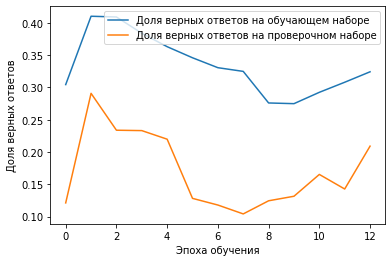

НЕЙРОНКА:  Тексты 01 + Dense

О. Генри распознано 14% сеть считает, что это Саймак, распознано НЕ ВЕРНО!
Стругацкие распознано 26% сеть считает, что это Стругацкие, распознано ВЕРНО!
Булгаков распознано 23% сеть считает, что это О. Генри, распознано НЕ ВЕРНО!
Саймак распознано 13% сеть считает, что это Стругацкие, распознано НЕ ВЕРНО!
Фрай распознано 32% сеть считает, что это Фрай, распознано ВЕРНО!
Брэдбери распознано 2% сеть считает, что это О. Генри, распознано НЕ ВЕРНО!

Средний процент распознавания 20%



In [0]:
#Создаём полносвязную сеть
model01 = Sequential()
model01.add(BatchNormalization())
model01.add(Dense(200, input_dim=maxWordsCount, activation="sigmoid"))
model01.add(Dropout(0.35))
model01.add(BatchNormalization())
model01.add(Dense(6, activation='linear'))

model01.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

#Обучаем сеть на выборке, сформированной по bag of words - xTrain01
history = model01.fit(xTrain01, 
                      yTrain, 
                      epochs=13,
                      batch_size=128,
                      validation_data=(xTest01, yTest))

plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

pred = recognizeMultiClass(model01, xTest6Classes01, "Тексты 01 + Dense")

**вывод** лучше всего работают, rely + sigmoid на выходе.

**h** меняем количество слоев.

3 слоя

Train on 17658 samples, validate on 6693 samples
Epoch 1/20
17658/17658 [==============================] - 21s 1ms/sample - loss: 0.5821 - acc: 0.9407 - val_loss: 1.0311 - val_acc: 0.6425
Epoch 2/20
17658/17658 [==============================] - 20s 1ms/sample - loss: 0.1027 - acc: 0.9906 - val_loss: 0.6616 - val_acc: 0.7571
Epoch 3/20
17658/17658 [==============================] - 20s 1ms/sample - loss: 0.0723 - acc: 0.9899 - val_loss: 0.6122 - val_acc: 0.7789
Epoch 4/20
17658/17658 [==============================] - 20s 1ms/sample - loss: 0.0672 - acc: 0.9894 - val_loss: 0.5852 - val_acc: 0.7983
Epoch 5/20
17658/17658 [==============================] - 20s 1ms/sample - loss: 0.0654 - acc: 0.9888 - val_loss: 0.6247 - val_acc: 0.7981
Epoch 6/20
17658/17658 [==============================] - 20s 1ms/sample - loss: 0.0644 - acc: 0.9894 - val_loss: 0.6247 - val_acc: 0.8035
Epoch 7/20
17658/17658 [==============================] - 20s 1ms/sample - loss: 0.0639 - acc: 0.9887 - val_loss: 0.6

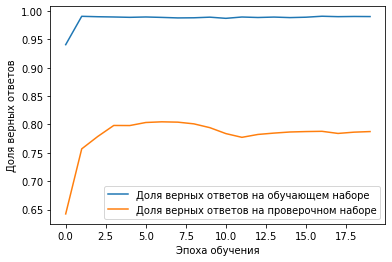

НЕЙРОНКА:  Тексты 01 + Dense

О. Генри распознано 11% сеть считает, что это Брэдбери, распознано НЕ ВЕРНО!
Стругацкие распознано 89% сеть считает, что это Стругацкие, распознано ВЕРНО!
Булгаков распознано 67% сеть считает, что это Булгаков, распознано ВЕРНО!
Саймак распознано 57% сеть считает, что это Саймак, распознано ВЕРНО!
Фрай распознано 90% сеть считает, что это Фрай, распознано ВЕРНО!
Брэдбери распознано 99% сеть считает, что это Брэдбери, распознано ВЕРНО!

Средний процент распознавания 78%



In [0]:
#Создаём полносвязную сеть
model01 = Sequential()
model01.add(BatchNormalization())
model01.add(Dense(200, input_dim=maxWordsCount, activation="relu"))
model01.add(Dropout(0.25))
model01.add(BatchNormalization())
model01.add(Dense(200, activation="relu"))
model01.add(Dropout(0.25))
model01.add(BatchNormalization())
model01.add(Dense(200, activation="relu"))
model01.add(Dropout(0.25))
model01.add(BatchNormalization())
model01.add(Dense(6, activation='sigmoid'))

model01.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

#Обучаем сеть на выборке, сформированной по bag of words - xTrain01
history = model01.fit(xTrain01, 
                      yTrain, 
                      epochs=20,
                      batch_size=128,
                      validation_data=(xTest01, yTest))

plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

pred = recognizeMultiClass(model01, xTest6Classes01, "Тексты 01 + Dense")

2 слоя

Train on 17658 samples, validate on 6693 samples
Epoch 1/20
17658/17658 [==============================] - 21s 1ms/sample - loss: 0.0634 - acc: 0.9841 - val_loss: 0.5529 - val_acc: 0.8080
Epoch 2/20
17658/17658 [==============================] - 20s 1ms/sample - loss: 1.7492e-05 - acc: 1.0000 - val_loss: 0.4240 - val_acc: 0.8501
Epoch 3/20
17658/17658 [==============================] - 20s 1ms/sample - loss: 2.8275e-06 - acc: 1.0000 - val_loss: 0.4590 - val_acc: 0.8473
Epoch 4/20
17658/17658 [==============================] - 20s 1ms/sample - loss: 2.0032e-06 - acc: 1.0000 - val_loss: 0.5253 - val_acc: 0.8419
Epoch 5/20
17658/17658 [==============================] - 20s 1ms/sample - loss: 1.6052e-06 - acc: 1.0000 - val_loss: 0.5663 - val_acc: 0.8389
Epoch 6/20
17658/17658 [==============================] - 19s 1ms/sample - loss: 1.2537e-06 - acc: 1.0000 - val_loss: 0.5828 - val_acc: 0.8394
Epoch 7/20
17658/17658 [==============================] - 19s 1ms/sample - loss: 1.7137e-06 - acc

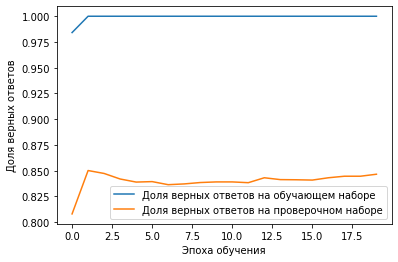

НЕЙРОНКА:  Тексты 01 + Dense

О. Генри распознано 95% сеть считает, что это О. Генри, распознано ВЕРНО!
Стругацкие распознано 90% сеть считает, что это Стругацкие, распознано ВЕРНО!
Булгаков распознано 65% сеть считает, что это Булгаков, распознано ВЕРНО!
Саймак распознано 67% сеть считает, что это Саймак, распознано ВЕРНО!
Фрай распознано 87% сеть считает, что это Фрай, распознано ВЕРНО!
Брэдбери распознано 97% сеть считает, что это Брэдбери, распознано ВЕРНО!

Средний процент распознавания 84%



In [0]:
#Создаём полносвязную сеть
model01 = Sequential()
model01.add(BatchNormalization())
model01.add(Dense(200, input_dim=maxWordsCount, activation="relu"))
model01.add(Dense(200, activation="relu"))
model01.add(Dense(6, activation='sigmoid'))

model01.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

#Обучаем сеть на выборке, сформированной по bag of words - xTrain01
history = model01.fit(xTrain01, 
                      yTrain, 
                      epochs=20,
                      batch_size=128,
                      validation_data=(xTest01, yTest))

plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

pred = recognizeMultiClass(model01, xTest6Classes01, "Тексты 01 + Dense")

**вывод** увеличение слоев ухудшает результат.

**g** меняем колличество нейронов в слоях.

Train on 17658 samples, validate on 6693 samples
Epoch 1/13
17658/17658 [==============================] - 12s 681us/sample - loss: 0.6709 - acc: 0.9730 - val_loss: 1.1965 - val_acc: 0.5069
Epoch 2/13
17658/17658 [==============================] - 11s 617us/sample - loss: 0.2644 - acc: 0.9669 - val_loss: 1.0747 - val_acc: 0.5894
Epoch 3/13
17658/17658 [==============================] - 11s 612us/sample - loss: 0.1415 - acc: 0.9452 - val_loss: 0.7332 - val_acc: 0.7016
Epoch 4/13
17658/17658 [==============================] - 11s 609us/sample - loss: 0.1123 - acc: 0.9444 - val_loss: 0.6283 - val_acc: 0.7560
Epoch 5/13
17658/17658 [==============================] - 11s 623us/sample - loss: 0.1020 - acc: 0.9439 - val_loss: 0.5706 - val_acc: 0.7851
Epoch 6/13
17658/17658 [==============================] - 11s 621us/sample - loss: 0.0988 - acc: 0.9453 - val_loss: 0.5058 - val_acc: 0.8156
Epoch 7/13
17658/17658 [==============================] - 11s 607us/sample - loss: 0.0951 - acc: 0.9467 -

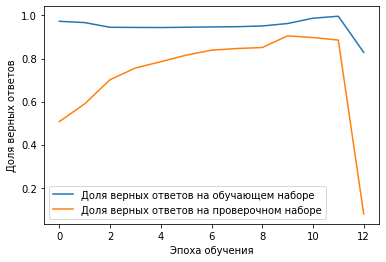

In [0]:
model01 = Sequential()
model01.add(BatchNormalization())
model01.add(Dense(62, input_dim=maxWordsCount, activation="relu"))
model01.add(Dropout(0.25))
model01.add(BatchNormalization())
model01.add(Dense(6, activation='sigmoid'))

model01.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

#Обучаем сеть на выборке, сформированной по bag of words - xTrain01
history = model01.fit(xTrain01, 
                      yTrain, 
                      epochs=13,
                      batch_size=128,
                      validation_data=(xTest01, yTest))

plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [0]:
def createTestMultiClasses(wordIndexes, xLen, step): #функция принимает последовательность индексов, размер окна, шаг окна

  #Для каждого из 6 классов
  #Создаём тестовую выборку из индексов
  nClasses = len(wordIndexes) #задаем количество классов
  xTest6Classes01 = []                #здесь будет список из всех классов,каждый размером "кол-во окон в тексте * 20000(при maxWordsCount=20000)"
  xTest6Classes = []                 #здесь будет список массивов, каждый размером "кол-во окон в тексте * длину окна"(6 по 420*1000)
  for wI in wordIndexes:                       #для каждого тестового текста из последовательности индексов
    sample = (getSetFromIndexes(wI, xLen, step)) #тестовая выборка размером "кол-во окон*длину окна"(например 420*1000)
    xTest6Classes.append(np.array(sample))              #переводим в массив numpy и добавляем в список
    xTest6Classes01.append(tokenizer.sequences_to_matrix(sample)) #трансформируется в Bag of Words в виде "кол-во окон в тексте * 20000"
  xTest6Classes01 = np.array(xTest6Classes01)                     #и добавляется к нашему списку, 
  
  return xTest6Classes01, xTest6Classes  #функция вернёт тестовые данные: TestBag 6 классов на n*20000 и xTestEm 6 по n*1000

###########################
# Расспознаём тестовую выборку и выводим результаты
##########################
def recognizeMultiClass(model, xTest, modelName):
  print("НЕЙРОНКА: ", modelName)
  print()
  
  val = []
  pred = []
  
  totalSumRec = []
  
  #Проходим по всем классам
  for i in range(nClasses):
    #Получаем результаты распознавания класса по блокам слов длины xLen
    currPred = model.predict(xTest[i])
    pred.append(currPred)
    #Определяем номер распознанного класса для каждохо блока слов длины xLen
    currOut = np.argmax(currPred, axis=1)
    
    #Считаем процент распознавания каждого класса за каждый
    #Получам матрицу 6 на 6
    evVal = []
    sumRec = []
    for j in range(nClasses):
      sumRec.append(0)
      for t in range(len(currOut)):
        if (currOut[t] == j):
          sumRec[j] += 1
      evVal.append(sumRec[j] / len(currOut))
    
    totalSumRec.append(sumRec[i])
    
    #Определяем, какой в класс в итоге за какой был распознан
    val.append(evVal[i])
    recognizedClass = np.argmax(evVal)
    
    #Выводим результаты распознавания по текущему классу
    isRecognized = "распознано НЕ ВЕРНО!"
    if (recognizedClass == i):
      isRecognized = "распознано ВЕРНО!"
    print(className[i], " распознано ", int(100*evVal[i]), "% сеть считает, что это ", className[recognizedClass], ", ", isRecognized, sep='')
  
  #Выводим вредний процент распознавания по всем классам вместе
  print()
  sumVal = 0
  sumCount = 0
  lenXtest = []
  for i in range(nClasses):
    sumCount += len(xTest[i])
    sumVal += totalSumRec[i]
  print("Средний процент распознавания ", int(100*sumVal/sumCount), "%", sep='')
    
  print()
  
  return sumVal/sumCount

In [0]:
xTest6Classes01, xTest6Classes = createTestMultiClasses(testWordIndexes, xLen, step)

In [0]:
#Проверяем точность нейронки обученной на bag of words
pred = recognizeMultiClass(model01, xTest6Classes01, "Тексты 01 + Dense")

НЕЙРОНКА:  Тексты 01 + Dense

О. Генри распознано 100% сеть считает, что это О. Генри, распознано ВЕРНО!
Стругацкие распознано 0% сеть считает, что это О. Генри, распознано НЕ ВЕРНО!
Булгаков распознано 0% сеть считает, что это О. Генри, распознано НЕ ВЕРНО!
Саймак распознано 0% сеть считает, что это О. Генри, распознано НЕ ВЕРНО!
Фрай распознано 0% сеть считает, что это О. Генри, распознано НЕ ВЕРНО!
Брэдбери распознано 0% сеть считает, что это О. Генри, распознано НЕ ВЕРНО!

Средний процент распознавания 7%



**Вывод** сеть разучилась распозновать авторов. Наверное не выдержала издевательств.

100 нейронов

Train on 17658 samples, validate on 6693 samples
Epoch 1/13
17658/17658 [==============================] - 15s 869us/sample - loss: 0.5628 - acc: 0.9657 - val_loss: 0.9870 - val_acc: 0.6667
Epoch 2/13
17658/17658 [==============================] - 14s 779us/sample - loss: 0.1426 - acc: 0.9724 - val_loss: 0.6442 - val_acc: 0.7596
Epoch 3/13
17658/17658 [==============================] - 14s 776us/sample - loss: 0.0642 - acc: 0.9799 - val_loss: 0.3962 - val_acc: 0.8705
Epoch 4/13
17658/17658 [==============================] - 14s 783us/sample - loss: 0.0411 - acc: 0.9902 - val_loss: 0.3757 - val_acc: 0.8693
Epoch 5/13
17658/17658 [==============================] - 14s 785us/sample - loss: 0.0108 - acc: 0.9997 - val_loss: 0.3407 - val_acc: 0.8830
Epoch 6/13
17658/17658 [==============================] - 14s 790us/sample - loss: 0.0035 - acc: 1.0000 - val_loss: 0.3267 - val_acc: 0.8896
Epoch 7/13
17658/17658 [==============================] - 14s 769us/sample - loss: 0.0022 - acc: 1.0000 -

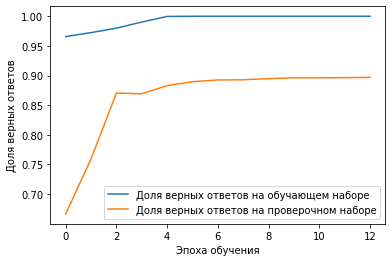

In [0]:
model01 = Sequential()
model01.add(BatchNormalization())
model01.add(Dense(100, input_dim=maxWordsCount, activation="relu"))
model01.add(Dropout(0.25))
model01.add(BatchNormalization())
model01.add(Dense(6, activation='sigmoid'))

model01.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

#Обучаем сеть на выборке, сформированной по bag of words - xTrain01
history = model01.fit(xTrain01, 
                      yTrain, 
                      epochs=13,
                      batch_size=128,
                      validation_data=(xTest01, yTest))

plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [0]:
def createTestMultiClasses(wordIndexes, xLen, step): #функция принимает последовательность индексов, размер окна, шаг окна

  #Для каждого из 6 классов
  #Создаём тестовую выборку из индексов
  nClasses = len(wordIndexes) #задаем количество классов
  xTest6Classes01 = []                #здесь будет список из всех классов,каждый размером "кол-во окон в тексте * 20000(при maxWordsCount=20000)"
  xTest6Classes = []                 #здесь будет список массивов, каждый размером "кол-во окон в тексте * длину окна"(6 по 420*1000)
  for wI in wordIndexes:                       #для каждого тестового текста из последовательности индексов
    sample = (getSetFromIndexes(wI, xLen, step)) #тестовая выборка размером "кол-во окон*длину окна"(например 420*1000)
    xTest6Classes.append(np.array(sample))              #переводим в массив numpy и добавляем в список
    xTest6Classes01.append(tokenizer.sequences_to_matrix(sample)) #трансформируется в Bag of Words в виде "кол-во окон в тексте * 20000"
  xTest6Classes01 = np.array(xTest6Classes01)                     #и добавляется к нашему списку, 
  
  return xTest6Classes01, xTest6Classes  #функция вернёт тестовые данные: TestBag 6 классов на n*20000 и xTestEm 6 по n*1000

###########################
# Расспознаём тестовую выборку и выводим результаты
##########################
def recognizeMultiClass(model, xTest, modelName):
  print("НЕЙРОНКА: ", modelName)
  print()
  
  val = []
  pred = []
  
  totalSumRec = []
  
  #Проходим по всем классам
  for i in range(nClasses):
    #Получаем результаты распознавания класса по блокам слов длины xLen
    currPred = model.predict(xTest[i])
    pred.append(currPred)
    #Определяем номер распознанного класса для каждохо блока слов длины xLen
    currOut = np.argmax(currPred, axis=1)
    
    #Считаем процент распознавания каждого класса за каждый
    #Получам матрицу 6 на 6
    evVal = []
    sumRec = []
    for j in range(nClasses):
      sumRec.append(0)
      for t in range(len(currOut)):
        if (currOut[t] == j):
          sumRec[j] += 1
      evVal.append(sumRec[j] / len(currOut))
    
    totalSumRec.append(sumRec[i])
    
    #Определяем, какой в класс в итоге за какой был распознан
    val.append(evVal[i])
    recognizedClass = np.argmax(evVal)
    
    #Выводим результаты распознавания по текущему классу
    isRecognized = "распознано НЕ ВЕРНО!"
    if (recognizedClass == i):
      isRecognized = "распознано ВЕРНО!"
    print(className[i], " распознано ", int(100*evVal[i]), "% сеть считает, что это ", className[recognizedClass], ", ", isRecognized, sep='')
  
  #Выводим вредний процент распознавания по всем классам вместе
  print()
  sumVal = 0
  sumCount = 0
  lenXtest = []
  for i in range(nClasses):
    sumCount += len(xTest[i])
    sumVal += totalSumRec[i]
  print("Средний процент распознавания ", int(100*sumVal/sumCount), "%", sep='')
    
  print()
  
  return sumVal/sumCount

In [0]:
xTest6Classes01, xTest6Classes = createTestMultiClasses(testWordIndexes, xLen, step)

In [0]:
#Проверяем точность нейронки обученной на bag of words
pred = recognizeMultiClass(model01, xTest6Classes01, "Тексты 01 + Dense")

НЕЙРОНКА:  Тексты 01 + Dense

О. Генри распознано 77% сеть считает, что это О. Генри, распознано ВЕРНО!
Стругацкие распознано 83% сеть считает, что это Стругацкие, распознано ВЕРНО!
Булгаков распознано 86% сеть считает, что это Булгаков, распознано ВЕРНО!
Саймак распознано 87% сеть считает, что это Саймак, распознано ВЕРНО!
Фрай распознано 93% сеть считает, что это Фрай, распознано ВЕРНО!
Брэдбери распознано 98% сеть считает, что это Брэдбери, распознано ВЕРНО!

Средний процент распознавания 89%



400 нейронов

Train on 17658 samples, validate on 6693 samples
Epoch 1/13
17658/17658 [==============================] - 34s 2ms/sample - loss: 0.2927 - acc: 0.9807 - val_loss: 0.7813 - val_acc: 0.7473
Epoch 2/13
17658/17658 [==============================] - 33s 2ms/sample - loss: 0.0374 - acc: 0.9939 - val_loss: 0.5672 - val_acc: 0.8206
Epoch 3/13
17658/17658 [==============================] - 33s 2ms/sample - loss: 0.0110 - acc: 0.9982 - val_loss: 0.3589 - val_acc: 0.8866
Epoch 4/13
17658/17658 [==============================] - 33s 2ms/sample - loss: 0.0037 - acc: 0.9999 - val_loss: 0.3311 - val_acc: 0.8954
Epoch 5/13
17658/17658 [==============================] - 33s 2ms/sample - loss: 0.0017 - acc: 1.0000 - val_loss: 0.3583 - val_acc: 0.8920
Epoch 6/13
17658/17658 [==============================] - 33s 2ms/sample - loss: 0.0011 - acc: 1.0000 - val_loss: 0.3683 - val_acc: 0.8884
Epoch 7/13
17658/17658 [==============================] - 33s 2ms/sample - loss: 8.0179e-04 - acc: 1.0000 - val_loss:

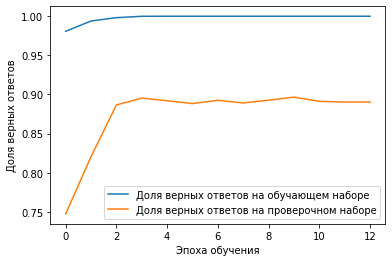

In [0]:
model01 = Sequential()
model01.add(BatchNormalization())
model01.add(Dense(400, input_dim=maxWordsCount, activation="relu"))
model01.add(Dropout(0.25))
model01.add(BatchNormalization())
model01.add(Dense(6, activation='sigmoid'))

model01.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

#Обучаем сеть на выборке, сформированной по bag of words - xTrain01
history = model01.fit(xTrain01, 
                      yTrain, 
                      epochs=13,
                      batch_size=128,
                      validation_data=(xTest01, yTest))

plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()
pred = recognizeMultiClass(model01, xTest6Classes01, "Тексты 01 + Dense")

Train on 17658 samples, validate on 6693 samples
Epoch 1/3
17658/17658 [==============================] - 33s 2ms/sample - loss: 1.4969e-04 - acc: 1.0000 - val_loss: 0.3863 - val_acc: 0.8930
Epoch 2/3
17658/17658 [==============================] - 33s 2ms/sample - loss: 1.4929e-04 - acc: 1.0000 - val_loss: 0.4047 - val_acc: 0.8899
Epoch 3/3
17658/17658 [==============================] - 33s 2ms/sample - loss: 1.1304e-04 - acc: 1.0000 - val_loss: 0.4056 - val_acc: 0.8896


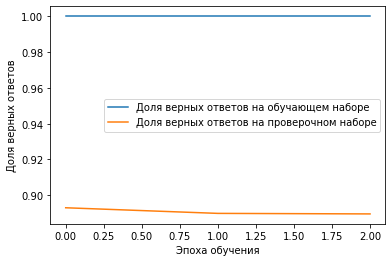

НЕЙРОНКА:  Тексты 01 + Dense

О. Генри распознано 91% сеть считает, что это О. Генри, распознано ВЕРНО!
Стругацкие распознано 88% сеть считает, что это Стругацкие, распознано ВЕРНО!
Булгаков распознано 78% сеть считает, что это Булгаков, распознано ВЕРНО!
Саймак распознано 82% сеть считает, что это Саймак, распознано ВЕРНО!
Фрай распознано 90% сеть считает, что это Фрай, распознано ВЕРНО!
Брэдбери распознано 99% сеть считает, что это Брэдбери, распознано ВЕРНО!

Средний процент распознавания 88%



In [0]:
history = model01.fit(xTrain01, 
                      yTrain, 
                      epochs=3,
                      batch_size=128,
                      validation_data=(xTest01, yTest))

plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()
pred = recognizeMultiClass(model01, xTest6Classes01, "Тексты 01 + Dense")

**ВЫвод** слой 100 или 200 нейронов подходит для дальнейших экспериментов.

#3 Embedding


**Embedding + Dense**

*Разбор данного раздела:* https://youtu.be/1goYctVeppE?t=7655


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 17658 samples, validate on 6693 samples
Epoch 1/30
17658/17658 [==============================] - 3s 158us/sample - loss: 1.1660 - acc: 0.6403 - val_loss: 2.3710 - val_acc: 0.3820
Epoch 2/30
17658/17658 [==============================] - 2s 134us/sample - loss: 0.4742 - acc: 0.8809 - val_loss: 2.7833 - val_acc: 0.2928
Epoch 3/30
17658/17658 [==============================] - 2s 132us/sample - loss: 0.2501 - acc: 0.8588 - val_loss: 3.1774 - val_acc: 0.2933
Epoch 4/30
17658/17658 [==============================] - 2s 133us/sample - loss: 0.1261 - acc: 0.8594 - val_loss: 2.7703 - val_acc: 0.3005
Epoch 5/30
17658/17658 [==============================] - 2s 132us/sample - loss: 0.1099 - acc: 0.8581 - val_loss: 2.4853 - val_acc: 0.3420
Epoch 6/30
17658/17658 [==============================] - 2s 134us/sample - loss: 0.1069 - acc: 0.8575 - val_loss: 2.0994 - val_acc: 

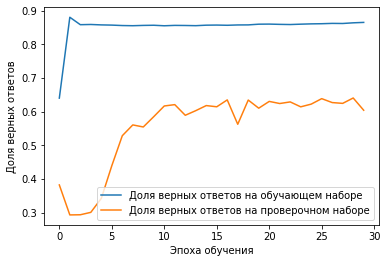

НЕЙРОНКА:  Embedding + Dense

О. Генри распознано 90% сеть считает, что это О. Генри, распознано ВЕРНО!
Стругацкие распознано 75% сеть считает, что это Стругацкие, распознано ВЕРНО!
Булгаков распознано 0% сеть считает, что это О. Генри, распознано НЕ ВЕРНО!
Саймак распознано 39% сеть считает, что это Стругацкие, распознано НЕ ВЕРНО!
Фрай распознано 81% сеть считает, что это Фрай, распознано ВЕРНО!
Брэдбери распознано 72% сеть считает, что это Брэдбери, распознано ВЕРНО!

Средний процент распознавания 60%



In [0]:
#Создаём сеть с Embedding слоем
modelE = Sequential()
modelE.add(Embedding(maxWordsCount, 30, input_length=xLen))
modelE.add(SpatialDropout1D(0.2))
modelE.add(Flatten())
modelE.add(BatchNormalization())
modelE.add(Dense(200, activation="relu"))
modelE.add(Dropout(0.2))
modelE.add(BatchNormalization())
modelE.add(Dense(6, activation='sigmoid'))

modelE.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

#Обучаем сеть на xTrain
history = modelE.fit(xTrain, 
                    yTrain, 
                    epochs=30,
                    batch_size=200,
                    validation_data=(xTest, yTest))


plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

#Проверяем результаты работы Ebedding сети
xTest6Classes01, xTest6Classes = createTestMultiClasses(testWordIndexes, xLen, step)
pred = recognizeMultiClass(modelE, xTest6Classes, "Embedding + Dense")

**j** размер вектора 2

Train on 17658 samples, validate on 6693 samples
Epoch 1/30
17658/17658 [==============================] - 2s 93us/sample - loss: 1.6090 - acc: 0.3496 - val_loss: 1.6870 - val_acc: 0.3043
Epoch 2/30
17658/17658 [==============================] - 1s 76us/sample - loss: 1.0262 - acc: 0.6341 - val_loss: 1.6196 - val_acc: 0.3011
Epoch 3/30
17658/17658 [==============================] - 1s 77us/sample - loss: 0.7955 - acc: 0.7021 - val_loss: 1.6807 - val_acc: 0.3502
Epoch 4/30
17658/17658 [==============================] - 1s 78us/sample - loss: 0.5330 - acc: 0.7536 - val_loss: 1.6993 - val_acc: 0.3389
Epoch 5/30
17658/17658 [==============================] - 1s 77us/sample - loss: 0.4231 - acc: 0.7678 - val_loss: 1.6989 - val_acc: 0.3519
Epoch 6/30
17658/17658 [==============================] - 1s 83us/sample - loss: 0.3538 - acc: 0.7920 - val_loss: 1.8105 - val_acc: 0.3560
Epoch 7/30
17658/17658 [==============================] - 1s 76us/sample - loss: 0.2895 - acc: 0.8287 - val_loss: 2.0

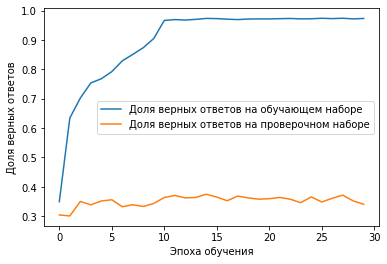

НЕЙРОНКА:  Embedding + Dense

О. Генри распознано 10% сеть считает, что это Стругацкие, распознано НЕ ВЕРНО!
Стругацкие распознано 26% сеть считает, что это Фрай, распознано НЕ ВЕРНО!
Булгаков распознано 20% сеть считает, что это Стругацкие, распознано НЕ ВЕРНО!
Саймак распознано 30% сеть считает, что это Фрай, распознано НЕ ВЕРНО!
Фрай распознано 66% сеть считает, что это Фрай, распознано ВЕРНО!
Брэдбери распознано 15% сеть считает, что это Стругацкие, распознано НЕ ВЕРНО!

Средний процент распознавания 34%



In [0]:
#Создаём сеть с Embedding слоем
modelE = Sequential()
modelE.add(Embedding(maxWordsCount, 2, input_length=xLen))
modelE.add(SpatialDropout1D(0.2))
modelE.add(Flatten())
modelE.add(BatchNormalization())
modelE.add(Dense(200, activation="relu"))
modelE.add(Dropout(0.2))
modelE.add(BatchNormalization())
modelE.add(Dense(6, activation='sigmoid'))

modelE.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

#Обучаем сеть на xTrain
history = modelE.fit(xTrain, 
                    yTrain, 
                    epochs=30,
                    batch_size=200,
                    validation_data=(xTest, yTest))


plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

#Проверяем результаты работы Ebedding сети
xTest6Classes01, xTest6Classes = createTestMultiClasses(testWordIndexes, xLen, step)
pred = recognizeMultiClass(modelE, xTest6Classes, "Embedding + Dense")

k. размер вектора 10

Train on 17658 samples, validate on 6693 samples
Epoch 1/30
17658/17658 [==============================] - 2s 109us/sample - loss: 1.3451 - acc: 0.5019 - val_loss: 1.9039 - val_acc: 0.2928
Epoch 2/30
17658/17658 [==============================] - 1s 84us/sample - loss: 0.6215 - acc: 0.8590 - val_loss: 2.5808 - val_acc: 0.2928
Epoch 3/30
17658/17658 [==============================] - 1s 83us/sample - loss: 0.3382 - acc: 0.8177 - val_loss: 2.5855 - val_acc: 0.2930
Epoch 4/30
17658/17658 [==============================] - 2s 89us/sample - loss: 0.2364 - acc: 0.8483 - val_loss: 2.3298 - val_acc: 0.2931
Epoch 5/30
17658/17658 [==============================] - 1s 84us/sample - loss: 0.1780 - acc: 0.8671 - val_loss: 1.7683 - val_acc: 0.3720
Epoch 6/30
17658/17658 [==============================] - 2s 87us/sample - loss: 0.1679 - acc: 0.8783 - val_loss: 1.5857 - val_acc: 0.4086
Epoch 7/30
17658/17658 [==============================] - 2s 86us/sample - loss: 0.1245 - acc: 0.9049 - val_loss: 1.

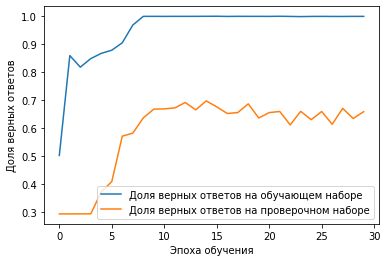

НЕЙРОНКА:  Embedding + Dense

О. Генри распознано 44% сеть считает, что это О. Генри, распознано ВЕРНО!
Стругацкие распознано 47% сеть считает, что это Стругацкие, распознано ВЕРНО!
Булгаков распознано 54% сеть считает, что это Булгаков, распознано ВЕРНО!
Саймак распознано 47% сеть считает, что это Саймак, распознано ВЕРНО!
Фрай распознано 91% сеть считает, что это Фрай, распознано ВЕРНО!
Брэдбери распознано 68% сеть считает, что это Брэдбери, распознано ВЕРНО!

Средний процент распознавания 65%



In [0]:
#Создаём сеть с Embedding слоем
modelE = Sequential()
modelE.add(Embedding(maxWordsCount, 10, input_length=xLen))
modelE.add(SpatialDropout1D(0.2))
modelE.add(Flatten())
modelE.add(BatchNormalization())
modelE.add(Dense(200, activation="relu"))
modelE.add(Dropout(0.2))
modelE.add(BatchNormalization())
modelE.add(Dense(6, activation='sigmoid'))

modelE.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

#Обучаем сеть на xTrain
history = modelE.fit(xTrain, 
                    yTrain, 
                    epochs=30,
                    batch_size=200,
                    validation_data=(xTest, yTest))


plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

#Проверяем результаты работы Ebedding сети
xTest6Classes01, xTest6Classes = createTestMultiClasses(testWordIndexes, xLen, step)
pred = recognizeMultiClass(modelE, xTest6Classes, "Embedding + Dense")

l. размер вектора 50

Train on 17658 samples, validate on 6693 samples
Epoch 1/30
17658/17658 [==============================] - 4s 234us/sample - loss: 1.1176 - acc: 0.6613 - val_loss: 2.5724 - val_acc: 0.2928
Epoch 2/30
17658/17658 [==============================] - 4s 202us/sample - loss: 0.4250 - acc: 0.9122 - val_loss: 2.8234 - val_acc: 0.2928
Epoch 3/30
17658/17658 [==============================] - 4s 202us/sample - loss: 0.1968 - acc: 0.8882 - val_loss: 2.5822 - val_acc: 0.2928
Epoch 4/30
17658/17658 [==============================] - 4s 202us/sample - loss: 0.1581 - acc: 0.8918 - val_loss: 2.4477 - val_acc: 0.2978
Epoch 5/30
17658/17658 [==============================] - 4s 202us/sample - loss: 0.1062 - acc: 0.9382 - val_loss: 1.6598 - val_acc: 0.3722
Epoch 6/30
17658/17658 [==============================] - 4s 201us/sample - loss: 0.0603 - acc: 0.9689 - val_loss: 2.1576 - val_acc: 0.3647
Epoch 7/30
17658/17658 [==============================] - 4s 202us/sample - loss: 0.0098 - acc: 0.9995 - val_lo

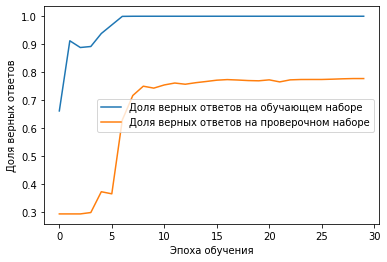

НЕЙРОНКА:  Embedding + Dense

О. Генри распознано 77% сеть считает, что это О. Генри, распознано ВЕРНО!
Стругацкие распознано 63% сеть считает, что это Стругацкие, распознано ВЕРНО!
Булгаков распознано 63% сеть считает, что это Булгаков, распознано ВЕРНО!
Саймак распознано 76% сеть считает, что это Саймак, распознано ВЕРНО!
Фрай распознано 94% сеть считает, что это Фрай, распознано ВЕРНО!
Брэдбери распознано 78% сеть считает, что это Брэдбери, распознано ВЕРНО!

Средний процент распознавания 77%



In [0]:
#Создаём сеть с Embedding слоем
modelE = Sequential()
modelE.add(Embedding(maxWordsCount, 50, input_length=xLen))
modelE.add(SpatialDropout1D(0.2))
modelE.add(Flatten())
modelE.add(BatchNormalization())
modelE.add(Dense(200, activation="relu"))
modelE.add(Dropout(0.2))
modelE.add(BatchNormalization())
modelE.add(Dense(6, activation='sigmoid'))

modelE.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

#Обучаем сеть на xTrain
history = modelE.fit(xTrain, 
                    yTrain, 
                    epochs=30,
                    batch_size=200,
                    validation_data=(xTest, yTest))


plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

#Проверяем результаты работы Ebedding сети
xTest6Classes01, xTest6Classes = createTestMultiClasses(testWordIndexes, xLen, step)
pred = recognizeMultiClass(modelE, xTest6Classes, "Embedding + Dense")

m. размер вектора 200

Train on 17658 samples, validate on 6693 samples
Epoch 1/30
17658/17658 [==============================] - 14s 780us/sample - loss: 1.0007 - acc: 0.7047 - val_loss: 2.8133 - val_acc: 0.2928
Epoch 2/30
17658/17658 [==============================] - 13s 748us/sample - loss: 0.3600 - acc: 0.8902 - val_loss: 2.3533 - val_acc: 0.2928
Epoch 3/30
17658/17658 [==============================] - 13s 749us/sample - loss: 0.1634 - acc: 0.8560 - val_loss: 2.6999 - val_acc: 0.2952
Epoch 4/30
17658/17658 [==============================] - 13s 747us/sample - loss: 0.1154 - acc: 0.8528 - val_loss: 2.1050 - val_acc: 0.3938
Epoch 5/30
17658/17658 [==============================] - 13s 748us/sample - loss: 0.1090 - acc: 0.8526 - val_loss: 1.8465 - val_acc: 0.4880
Epoch 6/30
17658/17658 [==============================] - 13s 750us/sample - loss: 0.1066 - acc: 0.8522 - val_loss: 1.6755 - val_acc: 0.6060
Epoch 7/30
17658/17658 [==============================] - 13s 752us/sample - loss: 0.1051 - acc: 0.8522 -

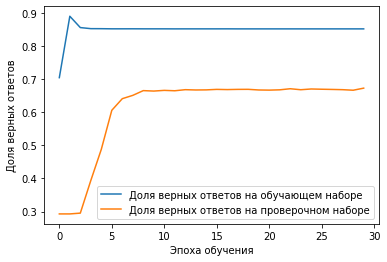

НЕЙРОНКА:  Embedding + Dense

О. Генри распознано 86% сеть считает, что это О. Генри, распознано ВЕРНО!
Стругацкие распознано 77% сеть считает, что это Стругацкие, распознано ВЕРНО!
Булгаков распознано 0% сеть считает, что это О. Генри, распознано НЕ ВЕРНО!
Саймак распознано 85% сеть считает, что это Саймак, распознано ВЕРНО!
Фрай распознано 86% сеть считает, что это Фрай, распознано ВЕРНО!
Брэдбери распознано 83% сеть считает, что это Брэдбери, распознано ВЕРНО!

Средний процент распознавания 67%



In [0]:
#Создаём сеть с Embedding слоем
modelE = Sequential()
modelE.add(Embedding(maxWordsCount, 200, input_length=xLen))
modelE.add(SpatialDropout1D(0.2))
modelE.add(Flatten())
modelE.add(BatchNormalization())
modelE.add(Dense(200, activation="relu"))
modelE.add(Dropout(0.2))
modelE.add(BatchNormalization())
modelE.add(Dense(6, activation='sigmoid'))

modelE.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

#Обучаем сеть на xTrain
history = modelE.fit(xTrain, 
                    yTrain, 
                    epochs=30,
                    batch_size=200,
                    validation_data=(xTest, yTest))


plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

#Проверяем результаты работы Ebedding сети
xTest6Classes01, xTest6Classes = createTestMultiClasses(testWordIndexes, xLen, step)
pred = recognizeMultiClass(modelE, xTest6Classes, "Embedding + Dense")

**вывод** размер вектора в 50 символов дал лучший результат.77% и верное распознование